# EDA To Prediction(feat. DieTanic)
* Reference Kaggle Notebbok
    * https://www.kaggle.com/ash316/eda-to-prediction-dietanic

* Data Discription
    * https://www.kaggle.com/c/titanic/data

"Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible." - Lisa Kleypas - 

Since it was always the worst, I think it's my turn to get it now. -20.05.18.mon.pm11:25-

---

* 📍 Review & Notice
    * Review - Day2. 20.05.16.sat
    * Again - Day2, Day3 20.05.17.sun
    * Again & Review - Day 4. 20.05.18.mon
    * Quick Review & Keep going - Day 5. 20.05.19.tue 

---

* 😁 Log of my life
    * Day 4. Whole Review & Keep learning

---

## Introduction

The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in comptetitions in kaggle.

**The Objective of this notebook** is to give an idea <code>how is the workflow in any predictive modeling problem.</code>

* Objective
    * How do we check features
    * How do we add new features and some Machine Learning Concept
    
I also try to  keep the notebook as basic as possible so that even newbies can understand every phase of it.

### Contents of the Notebook

* Part1: EDA(Exploratory Data Analysis)
    * Analysis of the Features - <code>Step1. Goal</code>
    * Finding any relations or trends considering multiple features <code>step2. Goal</code>
    
    
* Part2: Feature Engineering and Data Cleaning
    * Add any few features
    * Removing redundant features
    * Converting features into suitable form for modeling

---

# Part1: EDA(Exploratory Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's do some basics!

### #1. Load data

<code>pandas.read_csv</code><br>
Read a comma-separated values(csv) file into DataFrame.<br>
also supports optionally iterating or breaking of the file into chunks.


*Request 1. Read a comma-separated values file into DataFrame<br>*
<br>
<code>train.csv</code> 파일을 Pandas dataframe형태로 불러오시오.<br>

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassId, Survived, Pclass, etc...

In [3]:
data.shape

(891, 12)

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

891개의 data point와 12개의 feature

12개의 feature로는 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'가 있다.<br>

각각의 feature에 대한 상세한 설명은 아래에서 찾아볼 수 있다.<br>

* Data Discription
    * https://www.kaggle.com/c/titanic/data

*Q1. null값을 가지고 있는 data를 모두 찾기 위해서는 어떻게 해야할까?*

In [7]:
# checking for total null values

data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<code>pandas.isnull()</code>함수 만으로는 직관적으로 null값을 확인할 수 없다.

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

data에 <code>.isnull()</code>함수와 <code>.sum()</code>함수 명령어를 입력해주면 쉽게 확인할 수 있다

Dataset에서 null값 확인

Age 177, Cabin(배의 선실,객실) 687, Embarked 2에서 각각 null값이 존재한다.

*Q2. How many Survived??*<br>

얼마나 많은 사람들이 살아남았을까?<br>
우리가 예측할 class값을 확인해보자

In [9]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<code>어떤 명령어</code>를 통해 확인할 수 있을까?

<code>.value_counts()</code>함수를 통해 Survived class의 class별 data point 수를 쉽게 확인할 수 있다.

다른 Feature들에도 적용이 가능하다!

In [11]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

*Request 2. Titanic 사고로 인해 549명의 사망자와 342명의 생존자가 발생했습니다. 그렇다면 생존율은 얼마나 될까요? (시각화를 해주세요)*

*Q3. 생존률은 얼마나 되고 몇 명이나 살아남았을까?*

<code>.plot.pie()</code><br>
<code>.countplot()</code>

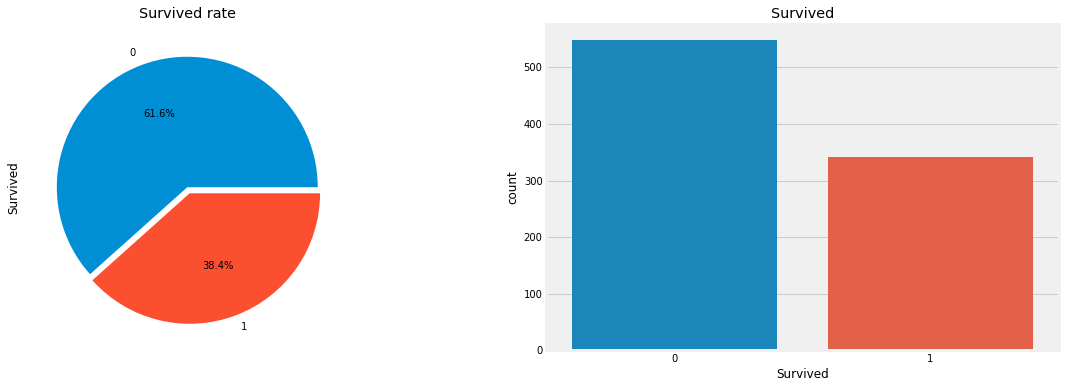

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
data.Survived.value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Survived rate')
sns.countplot(data.Survived, data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Survival rate(생존 비율)을 데이터셋의 다른 특징들에 대해 확인해 보도록 한다.

앞으로 많은 Kernel들을 공부하다보면 익숙해지겠지?

하나하나 꼼꼼히 짚고 넘어가면 좋겠지만 Review시에는 그렇게 하나씩 공부하고 평소에는 흐름(Flow)에 집중하도록 하자! -20.05.19.Tue-

## Analysing The Features

*Fist, 우선 Categorical Feature, Ordinal Feature, Continous Feature를 분석해보자*

In [21]:
# padas.DataFrame.colums: The column labels of the DataFrame

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1) Categorical Feature

🔖Pandas <code>dataframe.groupby()</code><br>https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/<br>

<code>dataframe.groupby()</code> function is used to split the data into groups based on some criteria. <br>pandas object can be split on any of their axes.

In [23]:
data.groupby('Sex')

# It returns GroupBy object

dataframe에 <code>.groupby()</code>function을 적용하면 object를 반환한다. 원하는 결과를 얻기위해서는 groupby object에 함수를 적용해야한다.

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

잠시 길이 셋는데 다시 시작해보도록 하겠다.

In [39]:
data.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [44]:
# pd.crosstab라는 유용한 함수는 뒤에서 다룰 것이다
pd.crosstab(data.Sex, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [45]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<code>pd.crosstab</code><br>
Compute a simple cross tabulation of two (or more) factors. 

In [46]:
pd.crosstab(data.Sex, data.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


*성별 생존률과 성별 생존자수를 구해보자.*<br>
막상 참고자료 없이 구하라고 문제가 주어지면 당황스러울 것 같다😯<br>
연습 또 연습하자ㅎ

* **1번째 옵션은 seaborn으로 가져가자...!"**

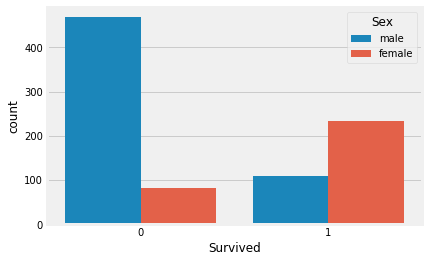

In [102]:
sns.countplot('Survived', hue='Sex', data=data)

* 두 번째 옵션은 dataframe.plot()을 응용하자

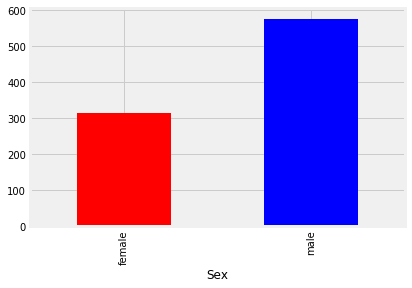

In [119]:
color_dict={'red': '#FF0000', 'blue':'#0000FF'}

data.groupby(['Sex'])['Survived'].count().plot.bar(colors=[x for x in color_dict])

* 조금 더 나아가 생존률을 구해보면

In [114]:
data.groupby('Sex')['Survived'].mean().plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x0000017394D826C8>>

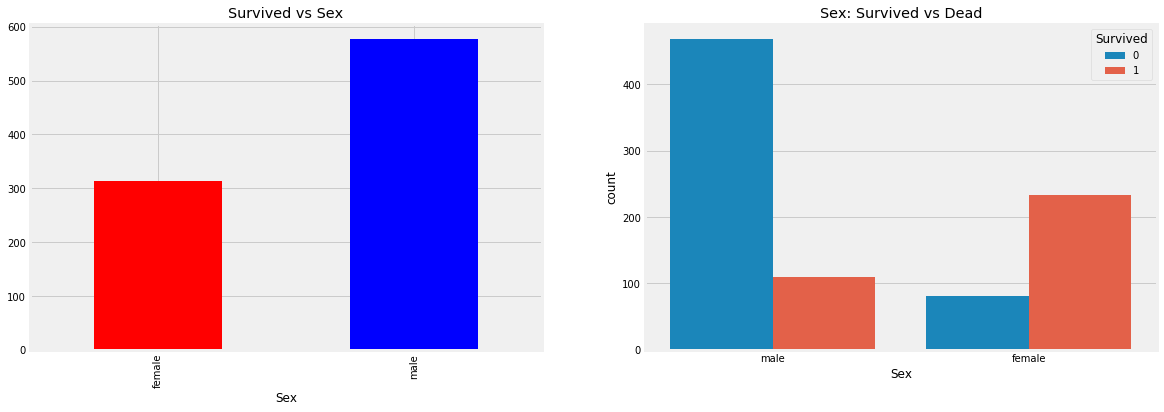

In [134]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

color = {'red':'#FF0000', 'blue': '#0000FF'}
# data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(colors=[x for x in color], ax=ax[0])
data.groupby('Sex')['Survived'].count().plot.bar(colors=[x for x in color], ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여성의 경우 생존 확률이 평균적으로 0.8로 나타남. 반면 남성의 경우 생존률이 0.2<br>
성별 생존여부를 보더라도 남성의 경우 사망이 생존보다 몇 배 높음.

좌석 등급에 따른 생존율은 어떻게 될까? 하나씩 살펴보도록한다.

### 2) Ordinal Feature

Ordinal Feature Pclass를 통해 데이터 분석을 해보자

🔖 Pandas <code>pandas.crosstab</code>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

<code>pandas.crosstab</code>함수를 사용해 간단하게 도표로 나타내보자

In [136]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


이해가 안가면 외우자. 안 외워지면 무한 반복만이 살길

In [139]:
data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<code>pd.crosstab</code>을 사용하면 앞서 배웠던 <code>pd.groupby</code>보다 데이터를 직관적으로 이해할 수 있는 것 같다.<br>
crosstab을 자주 사용하게 되지 않을까?

In [140]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [141]:
pd.crosstab(data.Sex, data.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


*Q4. 순서형 Feature(Ordinal Feature)로는 어떤 시각화를 할 수 있을까?*

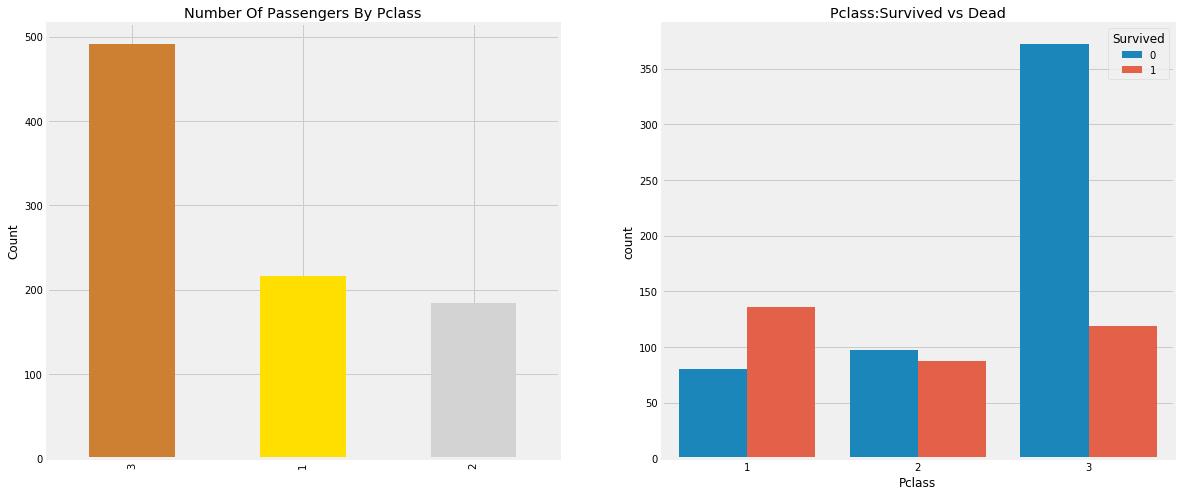

In [142]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# Pclass의 class별 생존 수는 어떻게 될까?
# sns.countplot() 함수 사용
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

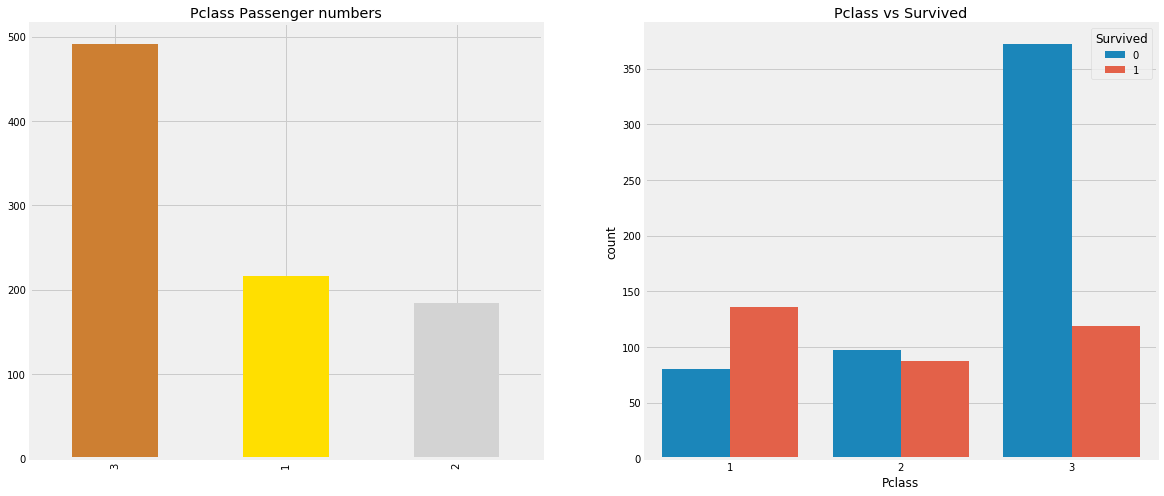

In [161]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
color=['#CD7F32', '#FFDF00', '#D3D3D3']
data.Pclass.value_counts().plot.bar(colors = [x for x in color], ax=ax[0])
ax[0].set_title('Pclass Passenger numbers')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass vs Survived')
color=['#CD7F32', '#FFDF00', '#D3D3D3']
# data.Pclass.value_counts().plot.bar(colors = [x for x in color], ax=ax[1, 0])
# ax[1, 0].set_title('Pclss Value_counts')
plt.show()

앞서는 <code>sns.countplot()</code>함수를 사용해 성별에 따른 생존자 수를 파악했다면 이번에는 같은 범주형 변수이지만 순서가 있는 Ordinal Feature Pclass를 통해 시각화를 해보았다.<br>

주목할 점은 3등석의 인원이 가장 많았지만 3등석의 사망자수가 가장 많다는 것이다.

People say **Money Can't Buy Everything.** But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though that the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

돈으로 모든 것을 살 수 없다지만... 높은 등급의 탑승객의 경우 생존을 더 많이 했다

*그렇다면 생존율은 얼마나 될까?*

In [65]:
data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


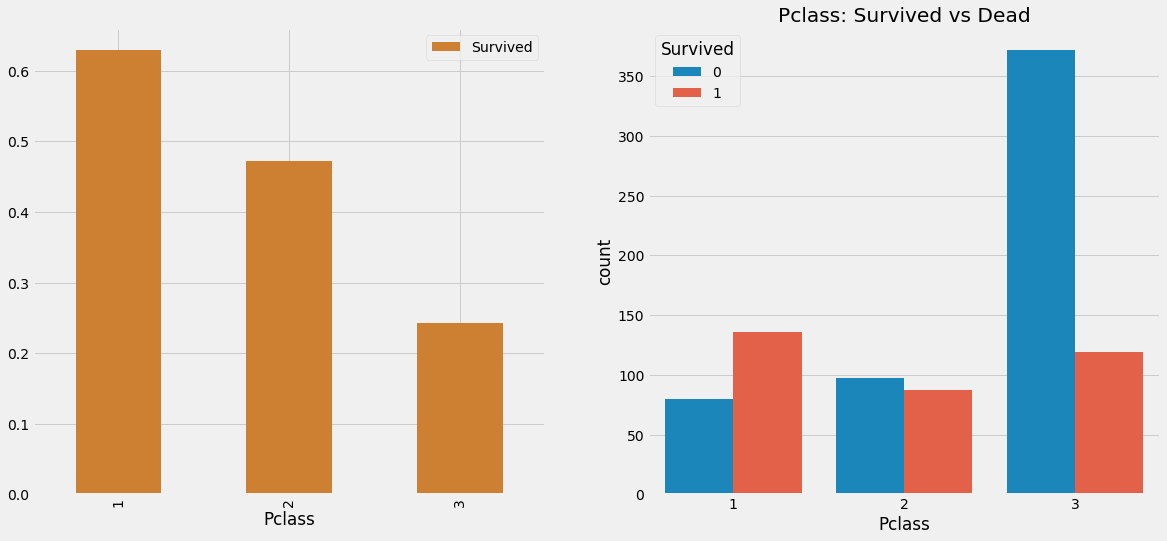

In [107]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

1등석의 승객의 경우 60%넘는 생존율을 보인다. 돈으로 모든 것을 살 수 없다고 하지만 1등석의 승객들의 생존률은 3등석의 생존률의 2배 이상이다

*Q5. Pclass와 성별에 따른 생존은 어떨까?*

In [113]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

3등석의 남자는 다 죽었구나...

In [202]:
pd.crosstab([data.Sex, data.Pclass], data.Survived, margins=True).style.background_gradient(cmap='summer_r')

*Q6. 탑승 등급별 남/녀의 생존률은 어떻게 될까?*

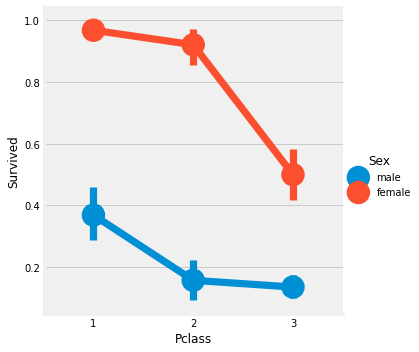

In [163]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

I use <code>FactorPlot</code> in this case, because they make the seperation of categorical values easy.<br>
we can easily infer survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 women from Pclass 1 died.

Pclass에 관계없이 여성이 더 우선적으로 살아남은 것으로 보인다.<br>
남/녀 할 것 없이 높은 등급의 좌석에 탑승하는게 생존율을 높이는데는 도움이 되었다

### 3. Continous Feature

In [116]:
print('Oldest Passenger was of:', data['Age'].max(), 'Year')
print('Youngest Passenger was of:', data['Age'].min(), 'Year')
print('Average Age on the ship:', data['Age'].mean(), 'Year')

Oldest Passenger was of: 80.0 Year
Youngest Passenger was of: 0.42 Year
Average Age on the ship: 29.69911764705882 Year


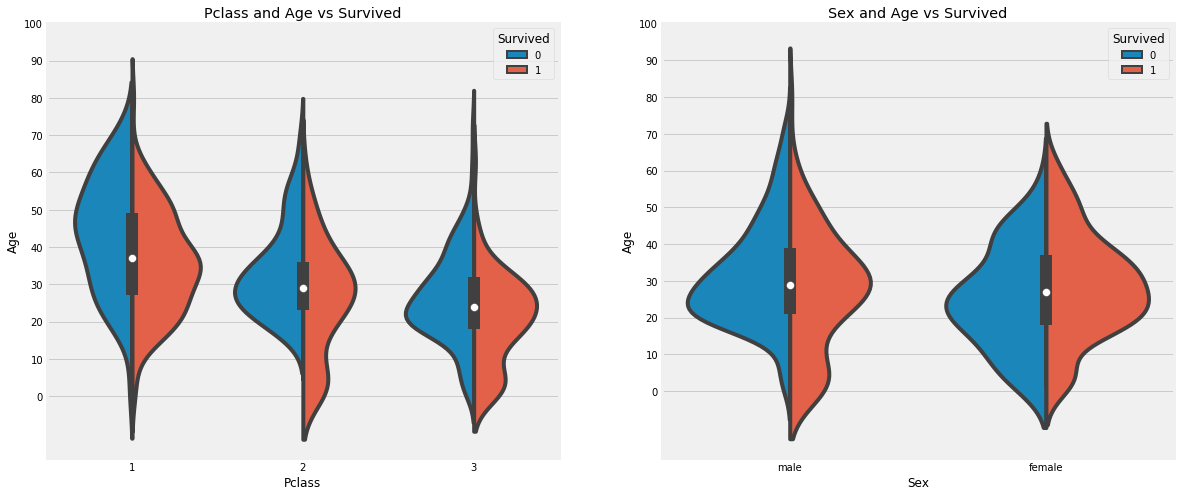

In [73]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Sex&Age, Survived
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

전에도 그랬고... 지금봐도 이 Violin plot은 참 적응이 안된다.. -20.05.17.sum-

🔖 <code>seaborn.violinplot</code><br>
https://seaborn.pydata.org/generated/seaborn.violinplot.html<br>

Draw a combination of boxplot and kernel density estimate

**Observations:**<br>
1) The number of children increases with Pclass and the susrvival rate for passengers below Age 10 looks to be good irrespective of the Pclass<br>
Pclass가 1등급에서 3등급으로 갈 수록 어린아이의 수는 많아진다. 그리고 10세 이하의 생존율은 Pclass에 관계없이 높다.<br>
2) Survival chances for Passengers aged 20-50 from Pclass 1 is high and is even better for Women<br>
Pclass1에서는 20-50대의 생존률이 높다. 그리고 여성의 경우도 마찬가지이다.<br>
3) For males, the survival chances decreases with an increase in age.<br>
남성의 경우 age가 증가할수록 생존율이 낮아지는 것을 알 수 있다.

이 외에 더 흥미로운 요소들이 많을텐데 생각해보면 좋을 거라 생각합니다<br>
<code>violinplot</code>에 대해서도 자세히 공부할 필요가 있겠네요.

---

::END:: basic Feature Analysis

---


### Pre-Process <code>Null values</code>

In [135]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            120
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

"As we had seen earlier, the Age feature has 177 null values. <code>To replace these NaN values</code>, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups."


Age Feature에 177개의 Null값을 채워줄 것입니다. 어떻게 할 수 있을까요??<br>
Age의 평균 값을 한 번 보겠습니다.

In [136]:
data.Age.mean()

29.35041504539559

우선, Null 값을 모두 29세로 채워주는 방법이 있을 수 있겠습니다. 더 좋은 방법은 없을까요?

...

Notebook kernel을 만들어주신 Swain님께서는 흥미로운 발상을 하셨습니다. 바로 Name Feature를 확인하는 것입니다!<br>
Mr, Mrs, ... 개인의 호칭에 따른 나이의 평균값을 Null값의 대체값으로 입력해주는 것입니다. 흥미롭군요.

* Note 깨알팁
    * 남성의 호칭은 Mr로 한정되어있지만 여성의 경우 호칭이 Ms/Mrs/Miss로 나뉩니다
    * Ms는 결혼한 여성
    * Miss는 미혼 여성
    * 그리고 Mrs는 미혼인지 기혼인지 알 수 없고 알리고 싶어하지 않는 여성들에게 사용된다고 합니다

### Fill the Null Values 

앞에서 얻은 Insight를 바탕으로 우리는 Name에 있는 '호칭'을 통해 나이를 추론하려고 합니다.

Pandas DataFrame에 'Initial'라는 Feature를 추가로 생성해줍니다.

In [155]:
data['Initial'] = 0

In [156]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial'],
      dtype='object')

Initial라는 새로운 Feature가 생성되었습니다.

In [157]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [158]:
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

In [159]:
data.Initial.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

<code>[A-Za-z]+)</code><br>
*what it does it?*<br>
It looks for strings which lie between A-Z or a-z and followed by a .(dot)<br>
So we successfuly extract the Initials from the Name

A-Z 또는 a-z 사이에 있고 그 뒤에.이 오는 문자열을 찾습니다. 그래서 이름의 Initial만을 추출할 수 있게 된 것입니다.

In [160]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so <code>there are some misspelled Initials</code> like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [161]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [162]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [163]:
data.groupby('Initial')['Age'].mean()  # lets check the average age by Initial

Initial
Master     4.616750
Miss      21.887097
Mr        32.739609
Mrs       35.984252
Other     45.888889
Name: Age, dtype: float64

각 호칭별로 계산한 평균 값을 채워주는 방식으로 Null값을 처리합니다.

### Filling NaN Ages

In [168]:
## Assignming the NaN Values with the Ceil values of the mean ages

# df.loc[행 인덱싱값, 열 인덱싱값]

data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33     # Age가 Null값이면서 호칭은 Mr인 경우
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36  # 이하 같은 방식
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age']=46

In [169]:
data.Age.isnull().sum()

0

In [170]:
data.Age.isnull().any() 

False

No nulll values left finally!

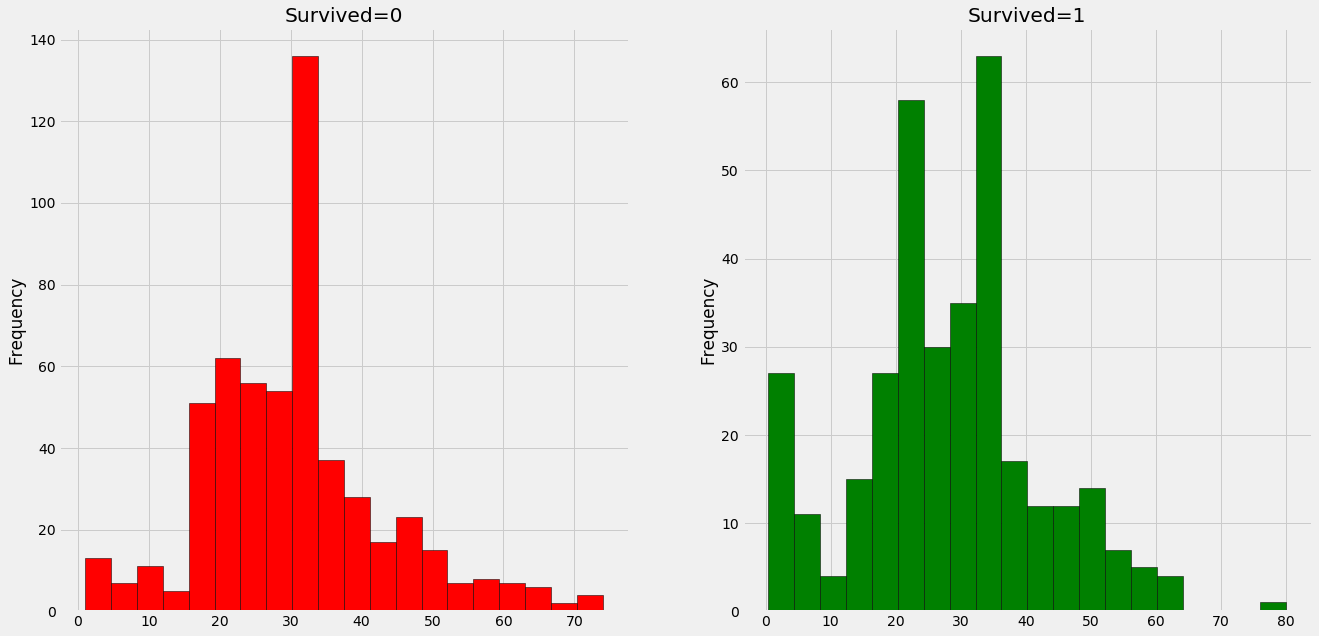

In [190]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(bins=20, ax=ax[0], edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))

data[data['Survived']==1].Age.plot.hist(bins=20, ax=ax[1], edgecolor='black', color='green')
ax[1].set_title('Survived=1')
x2 = list(range(0, 85, 5))
plt.show()

Observations:

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

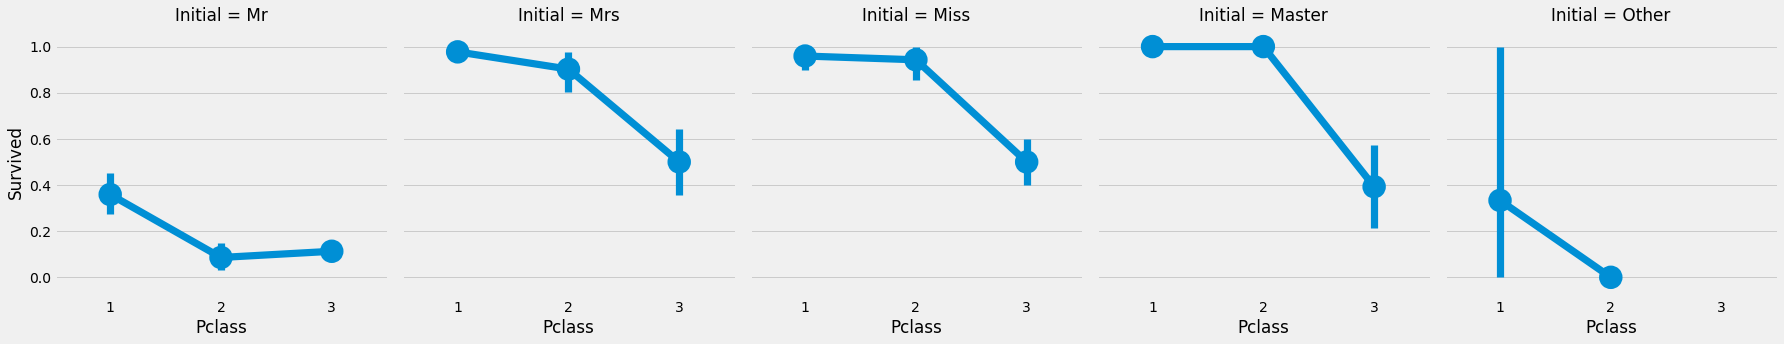

In [198]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

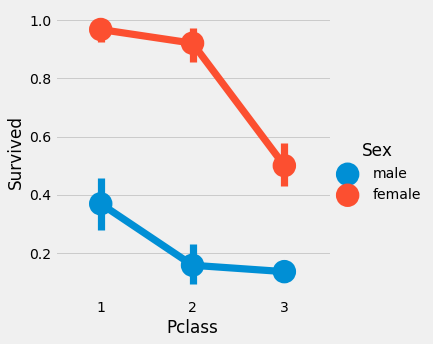

In [199]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

---

:: 🏊‍♀️ Keep going

### Categorical Value
* Embarked

In [207]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port of Embarkation

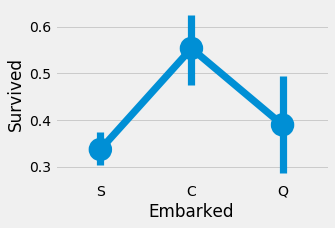

In [210]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S

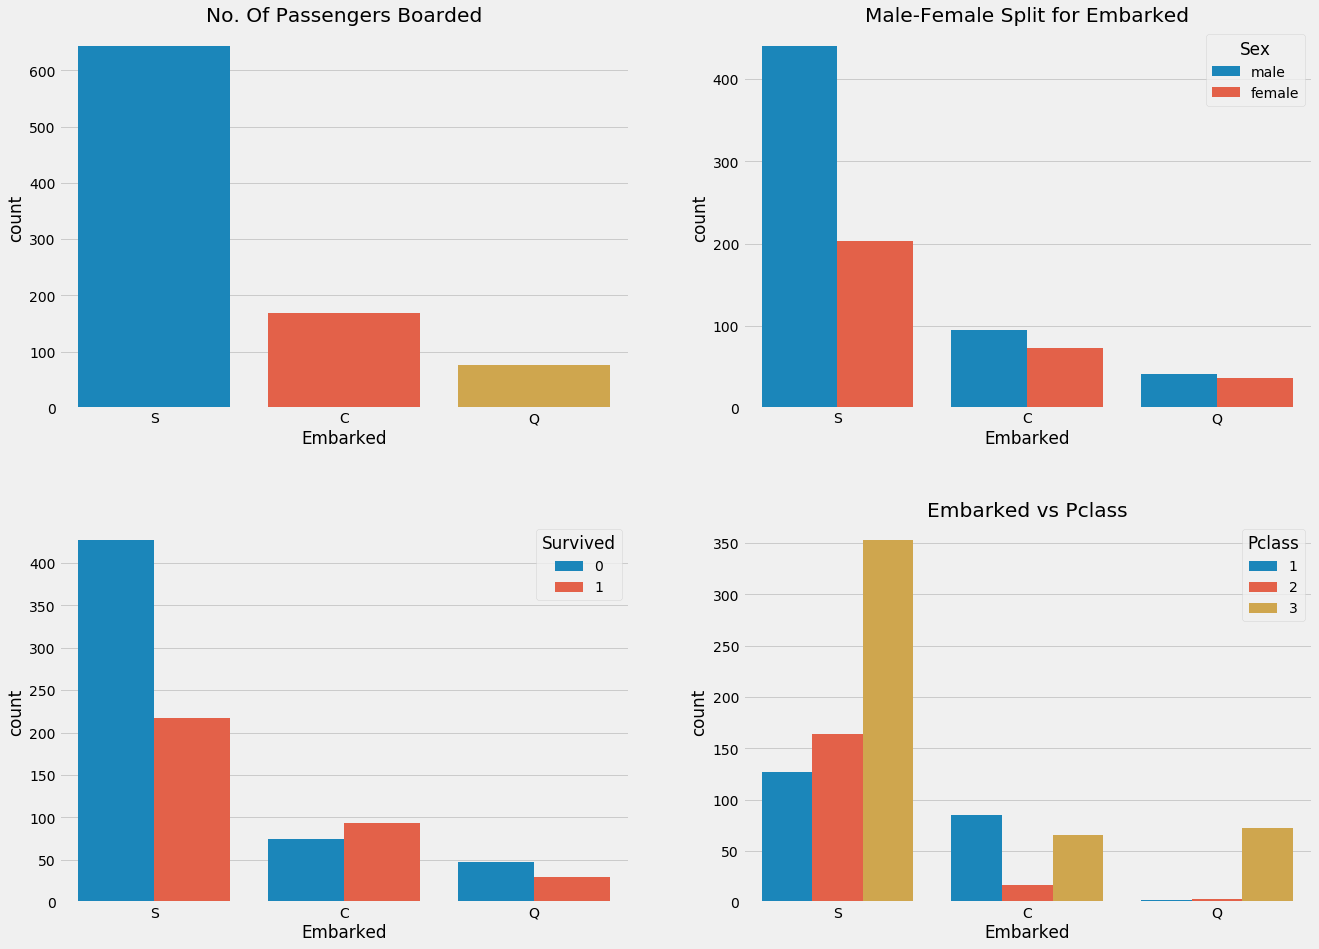

In [215]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1, 1].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

**Observations**:<br>
1) Maximum passengers boarderd from S, Majority of them being from Pclass 3.

2) The Passengers from C look to be lucky as good proportion of them survived. The reason for this may be the rescue of all the Pclass 1 and Pclass 2 Passengers.

3) The Embarked S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive

4) Port Q has almost 95% or the were from Pclass 3.

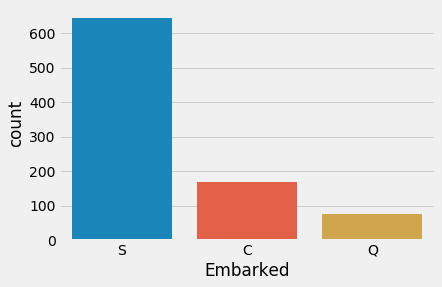

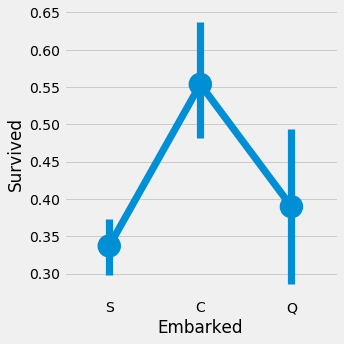

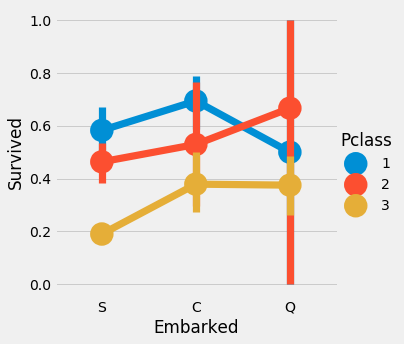

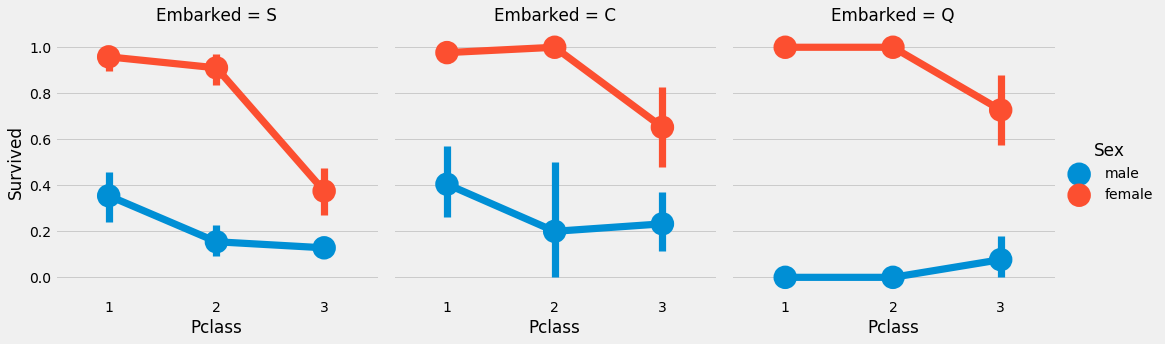

In [244]:
sns.countplot('Embarked', data=data)
plt.show()

sns.factorplot('Embarked',  'Survived', data=data)
plt.show()


sns.factorplot('Embarked',  'Survived' , hue='Pclass', data=data)
plt.show()

'''
sns.factorplot('Pclass',  'Survived' , hue='Embarked', data=data)
plt.show()
'''
# sns.factorplot('Pclass',  'Survived' , col='Embarked', data=data)
# plt.show()

sns.factorplot('Pclass',  'Survived' , hue='Sex', col='Embarked', data=data)
plt.show()

Filling Embarked NaN

as we saw that maximum passengers boared from Port S, we replace NaA with S.

In [ ]:
data['Embarked'].fillna

## Appendix

### Notebook을 공부하면서 정리하는 기본 개념들

* 정말 기본적인 것부터 시작 하고 싶다면 Pandas Tutorial을 한 번 제대로 공부하고 올 필요가 있다고 생각한다(매우 강한 긍정😀) -20.05.19.tue-
    * Pandas Tutorial<br>
        https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
        

1. <code>pandas.DataFrame.count</code>

Count non-NA cells for each column or row.

2. <code>pandas.dataframe.groupby()</code>

In [28]:
data.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [34]:
data.groupby('Sex').value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

<code>dataframe.groupby()</code>에는 <code>.value_counts()</code>를 사용할 수 없다.

In [35]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

3. <code>violinplot</code><br>
https://seaborn.pydata.org/generated/seaborn.violinplot.html

상자 그림과 커널 밀도 추정값의 조합을 그립니다.

<code>Violin plot</code>은 box plot 및 whisker plot과 비슷한 역할을 합니다. <code>Violin plot</code>은 정량적 데이터의 분포를 보여줍니다. 하나 또는 그 이상의 범주형 변수의 몇몇 특성들을 통해 분포를 비교할 수 있게 됩니다. 

모든 플롯 구성 요소가 실제 데이터 포인트에 해당하는 box plot과 달리 <code>Violin plot</code>에는 기본 분포의 커널 밀도 추정(kernel density estimation)이 있습니다.

자세한 정보는 <a src="https://seaborn.pydata.org/generated/seaborn.violinplot.html">Document</a>를 참고하시면 좋을 것 같습니다.

4. <code>Box Plot</code> 

<참고 - 프로도의 머리속><br>
    https://leebaro.tistory.com/entry/%EB%B0%95%EC%8A%A4-%ED%94%8C%EB%A1%AFbox-plot-%EC%84%A4%EB%AA%85

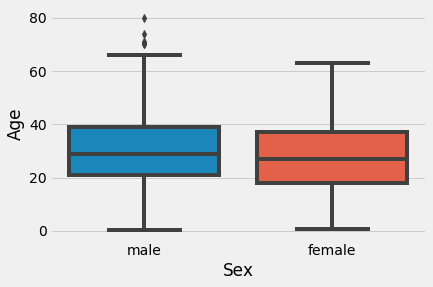

In [73]:
sns.boxplot('Sex','Age', data=data)

* Box plot을 사용하는 이유
    * box plot의 목적은 많은 데이터를 눈으로 확인하기 어려울 때, 그림을 이용해 데이터 집합의 범위와 중앙값을 빠르게 확인할 수 있는 목적으로 사용한다. 
    * 또한 통계적으로 이상치(ourlier)가 있는지도 확인할 수 있다.
    * 기술 통계학에서 box plot은 수치적 자료를 표현하는 그래프이다.
* Box Plot의 Five number summary
    * 1. 최솟값: 제 1사분위에서 1.5 IQR을 뺀 위치이다.
    * 2. 제 1사분위(Q1): 25%의 위치를 의미한다.
    * 3. 제 2사분위(Q2): 50%의 위치로 중앙값(median)을 의미한다.
    * 4. 제 3사분위(Q3): 75%의 위치를 의미한다.
    * 5. 최댓값: 제 3사분위에서 1.5 IQR을 더한 위치이다.
    * 최솟값과 최댓값을 넘어가는 위치에 있는 값을 이상치(Outlier)라고 부른다.

📌 해석할 수 있어야 할 것 같다. (Data Mining시간에 배웠었는데... 이론만 해서 기억속에서 잊혀진듯...) -20.05.19.Tue-